## Image regularization. Total variation image denoising.

The amount of noise in an image $I$ can be estimated using total variation function (sum of the norms of the gradient for all the pixels of the image):

\begin{equation*}
TV(I) = \sum_{x,y} \sqrt{\left(\frac{\partial I}{\partial x}\right)^2 + \left(\frac{\partial I}{\partial y}\right)^2}
\end{equation*},

Using finite difference for the derivatives, the function can be computed as:

\begin{equation*}
TV(I) = \sum_{i,j} \sqrt{\big(I(i+1,j) - I(i,j)\big)^2 + \big(I(i,j+1) - I(i,j)\big)^2}
\end{equation*}.

Using this function, the task of removing noise from an image can be formulated as the following optimization problem. You need to minimize the function $L(I)$ and $I_{noisy}$ is the input noisy image:

\begin{equation*}
L(I) = \lVert I_{noisy} - I \rVert_2 + \lambda \text{TV} (I) 
\end{equation*}

Implement minimization of this cost function using TensorFlow. Plot the image after denoising and compare it to the original image. Use the function ```tf.image.total_variation``` to compute total variation.

Useful links:

https://www.tensorflow.org/api_docs/python/tf/image/total_variation

https://en.wikipedia.org/wiki/Total_variation_denoising

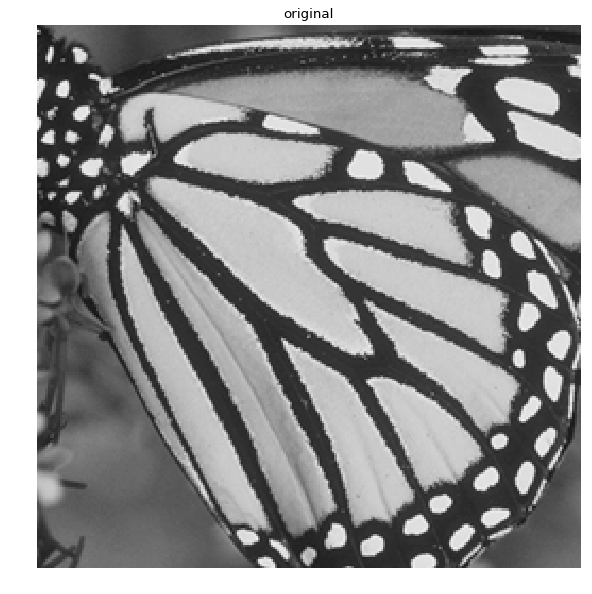

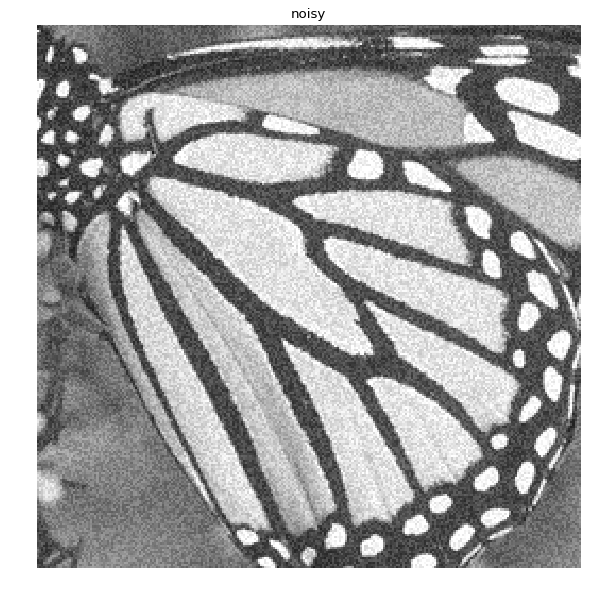

In [124]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import scipy
import scipy.misc
from scipy import ndimage
import matplotlib.image as mpimg
from skimage.color import rgb2gray

img = mpimg.imread('Data/General/butterfly.png')

img = rgb2gray(img).astype('float32')

I_noisy_batch = []

for i in range(10):
    I_noisy = img + 0.3 * np.random.random(img.shape)
    I_noisy = I_noisy[:,:,np.newaxis]
    I_noisy_batch.append(I_noisy)

I_noisy_batch = np.array(I_noisy_batch);

plt.figure(figsize=(9, 9), dpi=80)
plt.imshow(img, cmap=plt.cm.gray, vmin=0, vmax=1)
plt.title('original')
plt.axis('off')
plt.show()

plt.figure(figsize=(9, 9), dpi=80)
plt.imshow(I_noisy_2[:, :, 0], cmap=plt.cm.gray, vmin=0, vmax=1)
plt.title('noisy')
plt.axis('off')
plt.show()


step 0, loss: 498640
step 100, loss: 228262
step 200, loss: 107123
step 300, loss: 51235.9
step 400, loss: 25237
step 500, loss: 13152.8
step 600, loss: 7564.59
step 700, loss: 4997.33
step 800, loss: 3827.43
step 900, loss: 3298.52
step 1000, loss: 3061.92
step 1100, loss: 2957.22
step 1200, loss: 2911.27
step 1300, loss: 2891.61
step 1400, loss: 2883.27
step 1500, loss: 2879.79
step 1600, loss: 2878.41
step 1700, loss: 2877.9
step 1800, loss: 2877.74
step 1900, loss: 2877.7
step 2000, loss: 2877.71
step 2100, loss: 2877.76
step 2200, loss: 2877.77
step 2300, loss: 2877.81
step 2400, loss: 2877.84
step 2500, loss: 2877.87
step 2600, loss: 2877.91
step 2700, loss: 2877.93
step 2800, loss: 2877.97
step 2900, loss: 2878


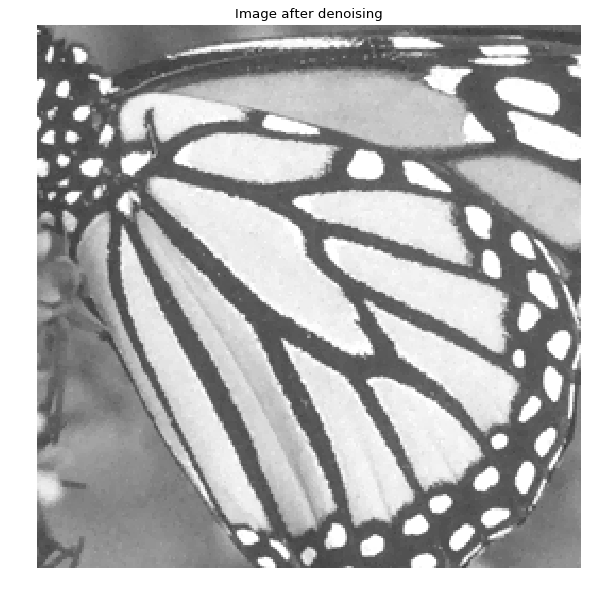

In [133]:
# your TF model is here
lam = 0.1
lr = 0.006

image = tf.Variable(tf.random_normal([1, img.shape[0], img.shape[1], 1]))
input_x = tf.placeholder(tf.float32, shape=[None, img.shape[0], img.shape[1], 1])

l2_loss = tf.nn.l2_loss(image - input_x)
loss = l2_loss + lam * tf.image.total_variation(image)
train_step = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())    
     
    n_steps = 3000
    for i in range(0, n_steps):
        [loss_val, I_val2] = sess.run([loss, image], feed_dict={input_x: I_noisy_batch})
        train_step.run(feed_dict={input_x: I_noisy_batch})
    
        if i % 100 == 0:
            print("step %d, loss: %g" % (i, loss_val))

            
plt.figure(figsize=(12, 9), dpi=80)  
plt.imshow(I_val2[0,:,:,0], cmap=plt.cm.gray, vmin=0, vmax=1)
plt.title('Image after denoising')
plt.axis('off')
plt.show()

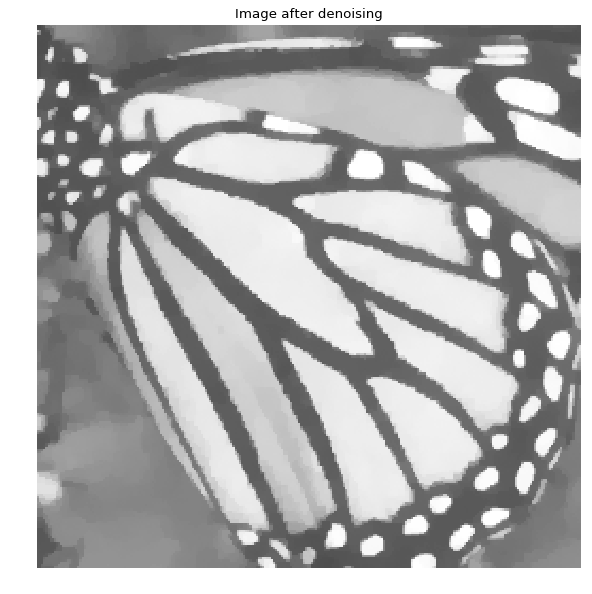

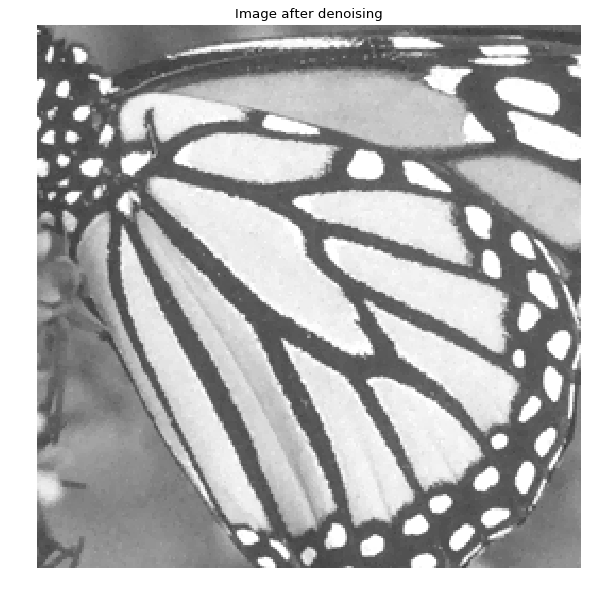

In [134]:
plt.figure(figsize=(12, 9), dpi=80)  
plt.imshow(I_val1[0,:,:,0], cmap=plt.cm.gray, vmin=0, vmax=1)
plt.title('Image after denoising')
plt.axis('off')
plt.show()

plt.figure(figsize=(12, 9), dpi=80)  
plt.imshow(I_val2[0,:,:,0], cmap=plt.cm.gray, vmin=0, vmax=1)
plt.title('Image after denoising')
plt.axis('off')
plt.show()

In [136]:
real_image = img[np.newaxis,:,:,np.newaxis]
l2_loss_1 = tf.nn.l2_loss(real_image - I_val1)
l2_loss_2 = tf.nn.l2_loss(real_image - I_val2)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())  
    [l1, l2] = sess.run([l2_loss_1, l2_loss_2])
    
    print(l1, l2)

821.15295 747.70276
